In [1]:
import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

import fastf1 as ff1


In [5]:
year = 2021
wknd = 'Silverstone'
ses = 'R'
driver = 'HAM'
colormap = mpl.cm.plasma

session = ff1.get_session(year, wknd, ses)
weekend = session.event
session.load()
lap = session.laps.pick_driver(driver).pick_fastest()
circuit_info = session.get_circuit_info()


core           INFO 	Loading data for British Grand Prix - Race [v3.4.3]
req            INFO 	Using cached data for session_info


req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '16', '77', '4', '3', '55', '14', '18', '31', '22', '10', '63', '99', '6', '7', '11', '9', '47', '5', '33']
/home/riccardo/anaconda3/envs/TF/lib/python3.11/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  

In [7]:

# Get telemetry data
x = lap.telemetry['X']              # values for x-axis
y = lap.telemetry['Y']              # values for y-axis
color = lap.telemetry['Speed']      # value to base color gradient on

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)


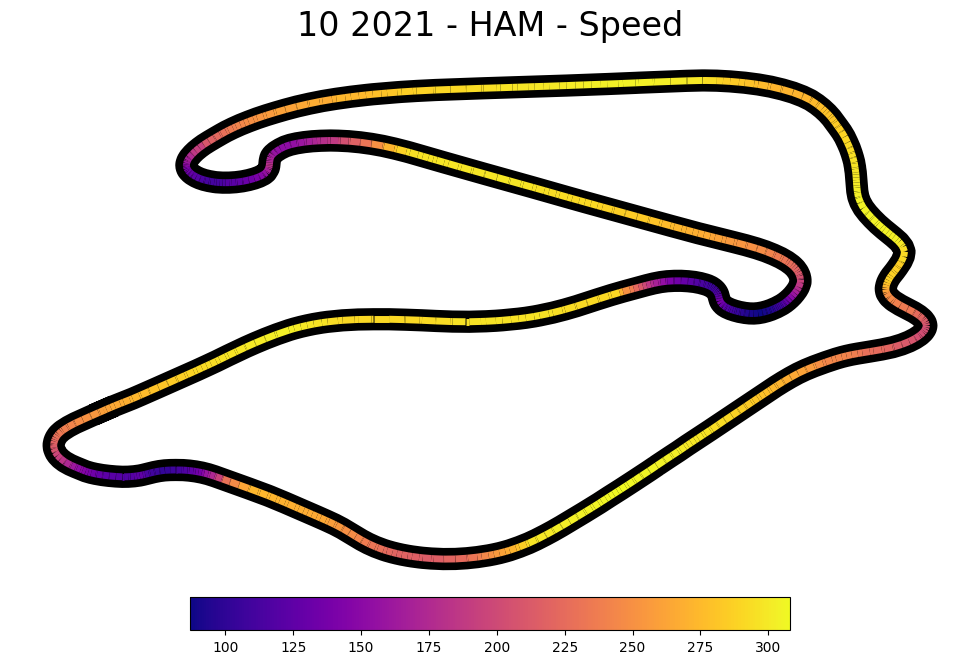

In [9]:

# We create a plot with title and adjust some setting to make it look good.
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
fig.suptitle(f'{weekend.name} {year} - {driver} - Speed', size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')


# After this, we plot the data itself.
# Create background track line
ax.plot(lap.telemetry['X'], lap.telemetry['Y'],
        color='black', linestyle='-', linewidth=16, zorder=0)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=colormap, norm=norm,
                    linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(color)

# Merge all line segments together
line = ax.add_collection(lc)


# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap,
                                   orientation="horizontal")


# Show the plot
plt.show()

In [16]:
import numpy as np
import pandas as pd
import fastf1 as ff1

# Charger la session pour un circuit spécifique
season_year = 2023
session = ff1.get_session(season_year, 'Silverstone', 'R')
session.load()

# Choisir le tour le plus rapide et récupérer les données de télémétrie
lap = session.laps.pick_fastest()
telemetry = lap.get_telemetry()
circuit_info = session.get_circuit_info()

# Initialiser le DataFrame des virages avec une colonne pour la vitesse moyenne
corner_df = circuit_info.corners[['X', 'Y', 'Number']]
corner_df['Average_Speed'] = None  # Colonne pour la vitesse moyenne

# Fonction pour trouver la vitesse du point le plus proche du virage
def find_closest_speed(corner_x, corner_y, telemetry):
    # Calculer les distances entre le virage et tous les points de télémétrie
    distances = np.sqrt((telemetry['X'] - corner_x) ** 2 + 
                        (telemetry['Y'] - corner_y) ** 2)
    
    # Trouver l'index du point le plus proche
    closest_index = distances.idxmin()
    
    # Retourner la vitesse du point le plus proche
    return telemetry.at[closest_index, 'Speed']

# Remplir le DataFrame avec la vitesse du point le plus proche pour chaque virage
for i in range(len(corner_df)):
    corner_x, corner_y = corner_df.iloc[i]['X'], corner_df.iloc[i]['Y']
    
    # Trouver la vitesse du point le plus proche du virage
    speed = find_closest_speed(corner_x, corner_y, telemetry)
    corner_df.at[i, 'Average_Speed'] = speed

# Afficher le DataFrame avec les résultats pour le circuit
print(corner_df)


core           INFO 	Loading data for British Grand Prix - Race [v3.4.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '44', '81', '63', '11', '14', '23', '16', '55', '2', '77', '27', '18', '24', '22', '21', '10', '20', '31']


              X             Y  Number Average_Speed
0   1192.508301   4503.826172       1           293
1   2770.315186   4462.892090       2           289
2   4845.322266   5895.130371       3           129
3   5802.704102   4733.524414       4            88
4   6232.291016   6458.979492       5           225
5    631.385986  10910.232422       6           175
6   -566.251648   9540.383789       7           111
7    761.338562  12361.558594       8           265
8   5893.893555  12947.209961       9           282
9   7295.830078   7780.465820      10           292
10  7534.993164   6906.171875      11           287
11  7336.696289   5474.734863      12           259
12  7776.478516   4163.521973      13           215
13  6806.810059   3146.688965      14           251
14  2398.952148  -4099.241211      15           228
15  -620.428711   -993.766174      16           141
16 -1438.052612  -1146.763184      17           119
17 -2309.334229   -105.719666      18           210


/tmp/ipykernel_34145/3110132322.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corner_df['Average_Speed'] = None  # Colonne pour la vitesse moyenne


# fonction speed 

In [14]:
import fastf1 as ff1

def calculate_corner_speeds(season_year, circuit_name, session_type, driver):
    """
    Calcule les vitesses moyennes dans chaque virage pour un pilote spécifique lors d'une session.
    
    Paramètres:
    - season_year (int) : Année de la saison.
    - circuit_name (str) : Nom du circuit (ex : 'Saudi Arabian Grand Prix').
    - session_type (str) : Type de session (ex : 'Q' pour qualification).
    - driver (str) : Code du pilote (ex : 'VER' pour Max Verstappen).
    
    Retour:
    - pd.DataFrame : DataFrame contenant les coordonnées des virages et la vitesse moyenne pour chaque virage.
    """
    
    # Charger la session pour un circuit spécifique
    session = ff1.get_session(season_year, circuit_name, session_type)
    session.load()

    # Filtrer les tours pour le pilote spécifié et choisir le tour le plus rapide
    lap = session.laps.pick_driver(driver).pick_fastest()
    telemetry = lap.get_telemetry()
    circuit_info = session.get_circuit_info()

    # Initialiser le DataFrame des virages avec une colonne pour la vitesse
    corner_df = circuit_info.corners[['X', 'Y', 'Number']]
    corner_df['Average_Speed'] = None  # Colonne pour la vitesse

    # Fonction pour trouver la vitesse du point le plus proche du virage
    def find_closest_speed(corner_x, corner_y, telemetry):
        # Calculer les distances entre le virage et tous les points de télémétrie
        distances = np.sqrt((telemetry['X'] - corner_x) ** 2 + 
                            (telemetry['Y'] - corner_y) ** 2)
        
        # Trouver l'index du point le plus proche
        closest_index = distances.idxmin()
        
        # Retourner la vitesse du point le plus proche
        return telemetry.at[closest_index, 'Speed']

    # Remplir le DataFrame avec la vitesse du point le plus proche pour chaque virage
    for i in range(len(corner_df)):
        corner_x, corner_y = corner_df.iloc[i]['X'], corner_df.iloc[i]['Y']
        
        # Trouver la vitesse du point le plus proche du virage
        speed = find_closest_speed(corner_x, corner_y, telemetry)
        corner_df.at[i, 'Average_Speed'] = speed

    return corner_df


In [16]:

# Exemple d'utilisation de la fonction
season_year = 2023
circuit_name = 'Silverstone'
session_type = 'R'
corner_speeds_df = calculate_corner_speeds(season_year, circuit_name, session_type, 'HAM')

# Afficher le DataFrame avec les résultats pour le circuit
print(corner_speeds_df)


core           INFO 	Loading data for British Grand Prix - Race [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '44', '81', '63', '11', '14', '23', '16', '55', '2', '77', '27', '18', '24', '22', '21', '10', '20', '31']
/home/riccardo/anaconda3/envs/py39_tf211/lib/python3.9/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


              X             Y  Number Average_Speed
0   1192.508301   4503.826172       1           298
1   2770.315186   4462.892090       2           291
2   4845.322266   5895.130371       3           135
3   5802.704102   4733.524414       4            85
4   6232.291016   6458.979492       5           225
5    631.385986  10910.232422       6           161
6   -566.251648   9540.383789       7           107
7    761.338562  12361.558594       8           272
8   5893.893555  12947.209961       9           281
9   7295.830078   7780.465820      10           308
10  7534.993164   6906.171875      11           299
11  7336.696289   5474.734863      12           250
12  7776.478516   4163.521973      13           199
13  6806.810059   3146.688965      14           241
14  2398.952148  -4099.241211      15           211
15  -620.428711   -993.766174      16           139
16 -1438.052612  -1146.763184      17           115
17 -2309.334229   -105.719666      18           206


/tmp/ipykernel_85319/475294906.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corner_df['Average_Speed'] = None  # Colonne pour la vitesse


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import fastf1

# Fonction pour effectuer la rotation
def rotate(xy, angle):
    rot_mat = np.array([[np.cos(angle), np.sin(angle)],
                        [-np.sin(angle), np.cos(angle)]])
    return np.matmul(xy, rot_mat)

/home/riccardo/anaconda3/envs/py39_tf211/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [11]:
import fastf1 as ff1
import numpy as np
import pandas as pd

def calculate_section_speeds(season_year, circuit_name, session_type, driver, sections_df):
    """
    Calcule les vitesses moyennes pour chaque section d'un circuit divisé en 50 sections.

    Paramètres:
    - season_year (int) : Année de la saison.
    - circuit_name (str) : Nom du circuit (ex : 'Saudi Arabian Grand Prix').
    - session_type (str) : Type de session (ex : 'Q' pour qualification).
    - driver (str) : Code du pilote (ex : 'VER' pour Max Verstappen).
    - sections_df (pd.DataFrame) : DataFrame contenant les coordonnées et informations de chaque section.
    
    Retour:
    - pd.DataFrame : DataFrame contenant les sections avec la vitesse moyenne pour chaque section.
    """
    
    # Charger la session pour un circuit spécifique
    session = ff1.get_session(season_year, circuit_name, session_type)
    session.load()

    # Filtrer les tours pour le pilote spécifié et choisir le tour le plus rapide
    lap = session.laps.pick_driver(driver).pick_fastest()
    telemetry = lap.get_telemetry()

    # DataFrame pour stocker les vitesses moyennes par section
    section_speeds = sections_df.copy()
    section_speeds['Average_Speed'] = None  # Colonne pour la vitesse moyenne

    # Fonction pour calculer la vitesse moyenne dans une section
    def calculate_average_speed(section_x, section_y, telemetry):
        distances = np.sqrt((telemetry['X'] - section_x) ** 2 + 
                            (telemetry['Y'] - section_y) ** 2)
        
        # Filtrer les points dans un rayon spécifique pour chaque section
        close_points = telemetry[distances < 100]  # ajustez le rayon si nécessaire
        
        # Calculer la vitesse moyenne des points proches
        if not close_points.empty:
            return close_points['Speed'].mean()
        else:
            return np.nan

    # Calculer la vitesse moyenne pour chaque section
    for i in range(len(section_speeds)):
        section_x, section_y = section_speeds.iloc[i]['X'], section_speeds.iloc[i]['Y']
        avg_speed = calculate_average_speed(section_x, section_y, telemetry)
        section_speeds.at[i, 'Average_Speed'] = avg_speed

    return section_speeds


In [8]:
import pandas as pd

# Load your dataset from the CSV file
sections_df = pd.read_csv("/home/riccardo/Visual_Studio_Code/F1/dataset_plus_strait_lines.csv")

# Define the parameters for the function
season_year = 2023
circuit_name = 'Bahrain Grand Prix'
session_type = 'Q'
driver = 'VER'  # Example driver code for Max Verstappen

# # Run the function
# try:
#     section_speeds = calculate_section_speeds(season_year, circuit_name, session_type, driver, sections_df)
#     print(section_speeds)
# except Exception as e:
#     print(f"An error occurred during the test: {e}")


In [21]:
# Fonction de rotation
def rotate(coords, angle):
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
    return np.dot(coords, rotation_matrix.T)


In [ ]:


sections_df = pd.read_csv("/home/riccardo/Visual_Studio_Code/F1/dataset_plus_strait_lines.csv")
schedule = ff1.get_event_schedule(2023)
for gp_name in schedule['EventName'][1:]:
    df = sections_df[sections_df['Grand Prix']== gp_name]
    session = ff1.get_session(2023, gp_name, 'R')
    session.load()
    lap = session.laps.pick_driver(driver).pick_fastest()
    telemetry = lap.get_telemetry()
    speed = telemetry[['Speed','X','Y']]
    track_angle = session.get_circuit_info().rotation * np.pi / 180

    # Apply the rotation to the 'X' and 'Y' coordinates in your DataFrame
    for i, row in speed[['X', 'Y']].iterrows():
        rotated_coords = rotate(np.array([[row['X'], row['Y']]]), track_angle)
        speed.at[i, 'X'] = rotated_coords[0, 0]
        speed.at[i, 'Y'] = rotated_coords[0, 1]

    
    


In [ ]:
session = ff1.get_session( 2023, 'Bahrain Grand Prix', 'R')
session.load()

# Filtrer les tours pour le pilote spécifié et choisir le tour le plus rapide
lap = session.laps.pick_driver(driver).pick_fastest()
telemetry = lap.get_telemetry()


core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '14', '55', '44', '18', '63', '77', '10', '23', '22', '2', '20', '21', '27', '24', '4', '31', '16', '81']
/home/riccardo/anaconda3/envs/py39_tf211/lib/python3.9/site-p

In [19]:
speed = telemetry[['Speed','X','Y']]


In [20]:
track_angle = session.get_circuit_info().rotation * np.pi / 180

In [30]:
# Apply the rotation to the 'X' and 'Y' coordinates in your DataFrame
for i, row in speed[['X', 'Y']].iterrows():
    rotated_coords = rotate(np.array([[row['X'], row['Y']]]), track_angle)
    speed.at[i, 'X'] = rotated_coords[0, 0]
    speed.at[i, 'Y'] = rotated_coords[0, 1]

/tmp/ipykernel_30834/1943664682.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1252.9663690862442' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  speed.at[i, 'X'] = rotated_coords[0, 0]
/tmp/ipykernel_30834/1943664682.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-423.9861765893248' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  speed.at[i, 'Y'] = rotated_coords[0, 1]


In [31]:
speed

,Speed,X,Y,NewX,NewY
2,284,-1252.966369,-423.986177,-1252.966369,-423.986177
3,284,-1255.964542,-424.090875,-1255.964542,-424.090875
4,285,-1318.031471,-423.256471,-1318.031471,-423.256471
5,286,-1415.111980,-422.644159,-1415.111980,-422.644159
6,287,-1544.277693,-420.150459,-1544.277693,-420.150459
...,...,...,...,...,...
724,284,-957.622583,-428.681687,-957.622583,-428.681687
725,284,-1105.776722,-426.851077,-1105.776722,-426.851077
726,285,-1135.828245,-425.899280,-1135.828245,-425.899280
727,285,-1231.909363,-425.252069,-1231.909363,-425.252069


In [32]:
import fastf1 as ff1
import pandas as pd
import numpy as np

# Load the sections dataframe
sections_df = pd.read_csv("/home/riccardo/Visual_Studio_Code/F1/dataset_plus_strait_lines.csv")
schedule = ff1.get_event_schedule(2023)

# Loop through each Grand Prix in the schedule
for gp_name in schedule['EventName'][1:]:
    df = sections_df[sections_df['Grand Prix'] == gp_name]
    
    # Load the session data for the Grand Prix
    session = ff1.get_session(2023, gp_name, 'R')
    session.load()
    
    # Get the telemetry of the fastest lap for the given driver
    lap = session.laps.pick_driver(driver).pick_fastest()
    telemetry = lap.get_telemetry()

    # Extract the X, Y, and Speed columns
    speed = telemetry[['Speed', 'X', 'Y']]
    
    # Get the track angle (rotation) of the circuit
    track_angle = session.get_circuit_info().rotation * np.pi / 180

    # Function to apply rotation to coordinates
    def rotate(coords, angle):
        rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
        return np.dot(coords, rotation_matrix.T)

    # Apply the rotation to the 'X' and 'Y' coordinates in telemetry
    rotated_coords = []
    for i, row in speed[['X', 'Y']].iterrows():
        rotated = rotate(np.array([[row['X'], row['Y']]]), track_angle)
        rotated_coords.append(rotated[0])

    # Convert rotated coordinates to a DataFrame
    rotated_df = pd.DataFrame(rotated_coords, columns=['Rotated_X', 'Rotated_Y'])

    # Now, match the rotated coordinates with the sections_df
    for i, row in df.iterrows():
        # Find the closest matching rotated coordinates in the telemetry
        closest_point = rotated_df.iloc[((rotated_df['Rotated_X'] - row['X']).abs() + (rotated_df['Rotated_Y'] - row['Y']).abs()).idxmin()]
        # Get the corresponding speed
        corresponding_speed = speed.iloc[closest_point.name]['Speed']
        
        # Assign the speed value to the section dataframe
        sections_df.at[i, 'Speed'] = corresponding_speed

# Now sections_df contains the speed associated with each X, Y in the sections


core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '14', '55', '44', '18', '63', '77', '10', '23', '22', '2', '20', '21', '27', '24', '4', '31', '16', '81']
/home/riccardo/anaconda3/envs/py39_tf211/lib/python3.9/site-p

In [43]:
bahrain_df = sections_df.drop('Unnamed: 0',axis=1)[sections_df['Grand Prix'] == 'Bahrain Grand Prix']

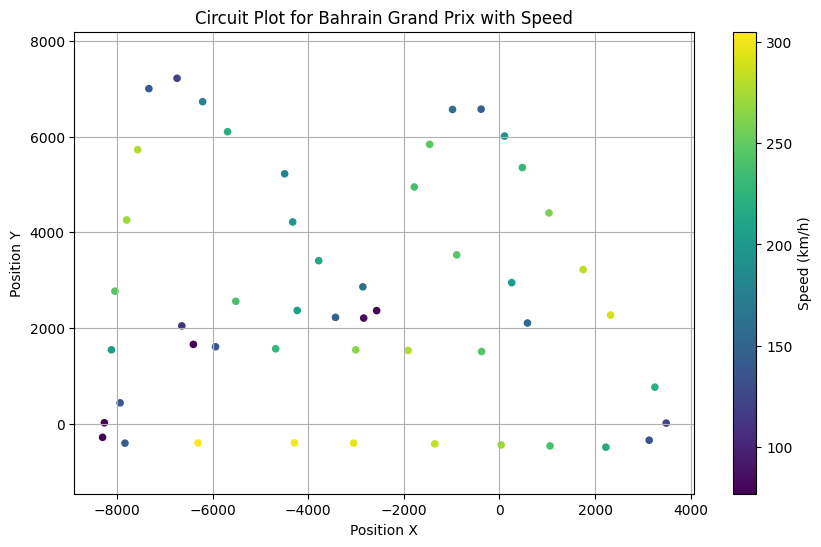

In [45]:
import matplotlib.pyplot as plt 
# Plotting the circuit with speed coloring
plt.figure(figsize=(10, 6))
sc = plt.scatter(bahrain_df['X'], bahrain_df['Y'], c=bahrain_df['Speed'], cmap='viridis', s=20)
plt.colorbar(sc, label='Speed (km/h)')
plt.title('Circuit Plot for Bahrain Grand Prix with Speed')
plt.xlabel('Position X')
plt.ylabel('Position Y')
plt.axis('equal')
plt.grid(True)
plt.show()

In [46]:
sections_df = sections_df.drop('Unnamed: 0',axis=1)

In [ ]:
import fastf1 as ff1
import pandas as pd
import numpy as np

# Load the sections dataframe
sections_df = pd.read_csv("/home/riccardo/Visual_Studio_Code/F1/dataset_plus_strait_lines.csv")
schedule = ff1.get_event_schedule(2023)

# Loop through each Grand Prix in the schedule
for gp_name in schedule['EventName'][1:]:
    df = sections_df[sections_df['Grand Prix'] == gp_name]
    
    # Load the session data for the Grand Prix
    session = ff1.get_session(2023, gp_name, 'R')
    session.load()
    
    # Get the list of drivers in the session
    drivers = session.results['Abbreviation'].tolist()
    
    # Initialize a list to store the speeds for averaging
    section_speeds = {idx: [] for idx in df.index}

    # Loop through each driver
    for driver in drivers:
        # Get the telemetry of the fastest lap for the current driver
        lap = session.laps.pick_drivers(driver).pick_fastest()
        telemetry = lap.get_telemetry()

        # Extract the X, Y, and Speed columns
        speed = telemetry[['Speed', 'X', 'Y']]
        
        # Get the track angle (rotation) of the circuit
        track_angle = session.get_circuit_info().rotation * np.pi / 180

        # Function to apply rotation to coordinates
        def rotate(coords, angle):
            rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
            return np.dot(coords, rotation_matrix.T)

        # Apply the rotation to the 'X' and 'Y' coordinates in telemetry
        rotated_coords = []
        for i, row in speed[['X', 'Y']].iterrows():
            rotated = rotate(np.array([[row['X'], row['Y']]]), track_angle)
            rotated_coords.append(rotated[0])

        # Convert rotated coordinates to a DataFrame
        rotated_df = pd.DataFrame(rotated_coords, columns=['Rotated_X', 'Rotated_Y'])
        rotated_df['Speed'] = speed['Speed'].values

        # Match each section in df with the closest point in rotated_df
        for i, row in df.iterrows():
            # Find the closest matching rotated coordinates in the telemetry
            distances = np.sqrt((rotated_df['Rotated_X'] - row['X']) ** 2 + (rotated_df['Rotated_Y'] - row['Y']) ** 2)
            closest_point_idx = distances.idxmin()
            corresponding_speed = rotated_df.iloc[closest_point_idx]['Speed']
            
            # Append the speed for the current driver to the section's list of speeds
            section_speeds[i].append(corresponding_speed)

    # Calculate the average speed for each section
    for idx, speeds in section_speeds.items():
        sections_df.at[idx, 'Speed'] = np.mean(speeds) if speeds else np.nan

# Now sections_df contains the average speed across all drivers for each X, Y in the sections


In [66]:
import fastf1 as ff1
import pandas as pd
import numpy as np

# Load the sections dataframe
sections_df = pd.read_csv("/home/riccardo/Visual_Studio_Code/F1/dataset_plus_strait_lines.csv")
schedule = ff1.get_event_schedule(2023)

# Loop through each Grand Prix in the schedule
for gp_name in schedule['EventName'][1:]:
    # Filter sections for the current Grand Prix
    df = sections_df[sections_df['Grand Prix'] == gp_name].reset_index()

    # Load the session data for the Grand Prix
    session = ff1.get_session(2023, gp_name, 'R')
    session.load()

    # Get the list of drivers in the session
    drivers = session.results['Abbreviation'].tolist()

    # Initialize a dictionary to store speeds for averaging
    section_speeds = {idx: [] for idx in df.index}

    # Loop through each driver
    for driver in drivers:
        try:
            # Get the telemetry of the fastest lap for the current driver
            lap = session.laps.pick_drivers(driver).pick_fastest()
            telemetry = lap.get_telemetry()

            # Ensure consistent data types for the telemetry columns
            telemetry['X'] = telemetry['X'].astype(float)
            telemetry['Y'] = telemetry['Y'].astype(float)
            telemetry['Speed'] = telemetry['Speed'].astype(float)
            
            # Extract only necessary columns
            speed = telemetry[['Speed', 'X', 'Y']]
            
            # Get the track angle (rotation) of the circuit
            track_angle = session.get_circuit_info().rotation * np.pi / 180

            # Function to apply rotation to coordinates
            def rotate(coords, angle):
                rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
                return np.dot(coords, rotation_matrix.T)

            # Apply the rotation to the 'X' and 'Y' coordinates in telemetry
            rotated_coords = []
            for i, row in speed[['X', 'Y']].iterrows():
                rotated = rotate(np.array([[row['X'], row['Y']]]), track_angle)
                rotated_coords.append(rotated[0])

            # Convert rotated coordinates to a DataFrame
            rotated_df = pd.DataFrame(rotated_coords, columns=['Rotated_X', 'Rotated_Y'])
            rotated_df['Speed'] = speed['Speed'].values

            # Match each section in df with the closest point in rotated_df
            for i, row in df.iterrows():
                # Find the closest matching rotated coordinates in the telemetry
                distances = np.sqrt((rotated_df['Rotated_X'] - row['X']) ** 2 + (rotated_df['Rotated_Y'] - row['Y']) ** 2)
                closest_point_idx = distances.idxmin()
                corresponding_speed = rotated_df.iloc[closest_point_idx]['Speed']
                
                # Append the speed for the current driver to the section's list of speeds
                section_speeds[i].append(corresponding_speed)

        except KeyError as e:
            print(f"Warning: Skipping driver {driver} in {gp_name} due to missing telemetry data ({e})")
            continue

    # Calculate the average speed for each section
    for idx, speeds in section_speeds.items():
        sections_df.at[idx, 'Speed'] = np.mean(speeds) if speeds else np.nan

# Now sections_df contains the average speed across all drivers for each section in all Grand Prix events


core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '14', '55', '44', '18', '63', '77', '10', '23', '22', '2', '20', '21', '27', '24', '4', '31', '16', '81']
core        WARNING 	Failed to preserve data type for column 

req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['11', '1', '16', '14', '55', '44', '18', '63', '4', '22', '81', '23', '20', '10', '31', '2', '27', '77', '24', '21']
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' 

req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '16', '44', '14', '63', '4', '31', '18', '22', '10', '77', '24', '23', '20', '3', '2', '27', '55', '81']
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' w

req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '10', '11', '55', '44', '4', '23', '81', '31', '18', '27', '40', '77', '22', '20', '63', '24', '16', '2']
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' 

req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	No lap data for driver 18
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 18)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['55', '4', '44', '16', '1', '10', '81', '11', '40', '20', '23', '24', '27', '2', '14', '63', '77', '31', '22', '18']
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core  

req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '16', '44', '55', '63', '14', '31', '10', '40', '22', '24', '27', '20', '23', '2', '18', '11', '77']
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' 

req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '55', '11', '63', '10', '18', '22', '23', '2', '27', '77', '24', '20', '3', '14', '81', '31', '44', '16']
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' w

req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '14', '11', '18', '55', '10', '44', '22', '31', '2', '27', '3', '81', '63', '77', '24', '20', '23', '16']
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' w

req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '11', '31', '18', '55', '44', '63', '14', '81', '10', '23', '20', '3', '24', '2', '77', '22', '27', '4']
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' w

In [70]:
sections_df

,Unnamed: 0,X,Y,Angle,Grand Prix,Straight_Line,Speed
0,0,-1352.045659,-423.443663,NaN,Bahrain Grand Prix,6297.0,225.50
1,1,-3050.629355,-407.713797,NaN,Bahrain Grand Prix,6297.0,257.30
2,2,-4287.551593,-402.878816,NaN,Bahrain Grand Prix,6297.0,274.90
3,3,-6304.661766,-406.277016,NaN,Bahrain Grand Prix,6297.0,168.65
4,4,-7830.512652,-408.529816,NaN,Bahrain Grand Prix,6297.0,162.70
...,...,...,...,...,...,...,...
1095,1095,-185.023103,-413.409545,69.24,Abu Dhabi Grand Prix,1046.0,NaN
1096,1096,377.927072,845.470951,NaN,Abu Dhabi Grand Prix,209.0,NaN
1097,1097,1131.005791,1325.534949,NaN,Abu Dhabi Grand Prix,NaN,NaN
1098,1098,1657.925403,1343.303524,98.09,Abu Dhabi Grand Prix,NaN,NaN


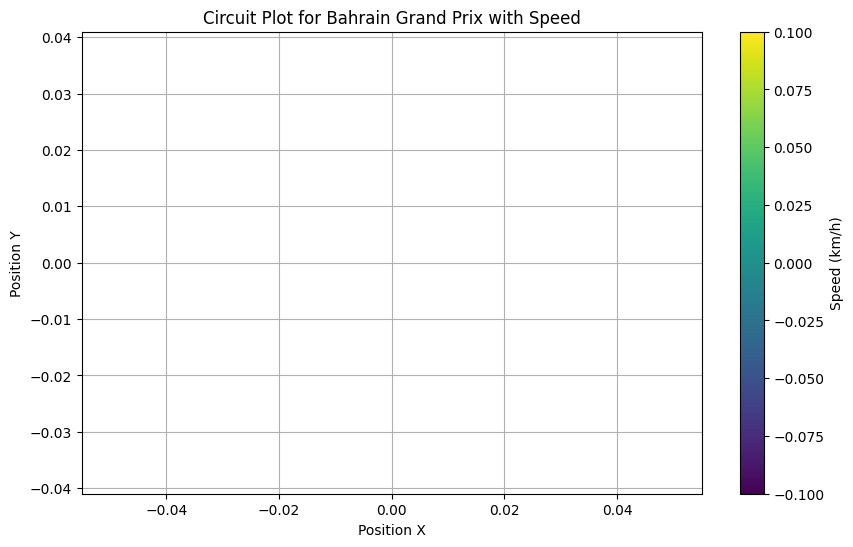

In [69]:
bahrain_df = sections_df.drop('Unnamed: 0',axis=1)[sections_df['Grand Prix'] == 'Abu Dhabi Grand Prix']
import matplotlib.pyplot as plt 
# Plotting the circuit with speed coloring
plt.figure(figsize=(10, 6))
sc = plt.scatter(bahrain_df['X'], bahrain_df['Y'], c=bahrain_df['Speed'], cmap='viridis', s=20)
plt.colorbar(sc, label='Speed (km/h)')
plt.title('Circuit Plot for Bahrain Grand Prix with Speed')
plt.xlabel('Position X')
plt.ylabel('Position Y')
plt.axis('equal')
plt.grid(True)
plt.show()